# 

In [1]:
import pyreadr
import numpy as np
import pandas as pd
import swifter
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
import scipy.stats as stats
from scipy.linalg import eigh
import pickle
from itertools import product

In [2]:
from fault_detection_algorithms.PCAFaultDetector import PCAFaultDetector
from fault_detection_algorithms.fault_detector import BaseFaultDetectionAlgorithm 
from utils_ import plot_all_roc_curves

In [3]:
from fast_dataset_open import open_with_cache

In [97]:
import importlib
import fault_detection_algorithms.PCAFaultDetector
import fault_detection_algorithms.fault_detector
import utils_

importlib.reload(fault_detection_algorithms.PCAFaultDetector)
importlib.reload(fault_detection_algorithms.fault_detector)
importlib.reload(utils_)

from fault_detection_algorithms.PCAFaultDetector import PCAFaultDetector
from fault_detection_algorithms.fault_detector import BaseFaultDetectionAlgorithm
from utils_ import plot_all_roc_curves


In [5]:
# constants
datasets_dir = "datasets"
dataset_dir = f"./{datasets_dir}/TEP/"

In [6]:
test_df = open_with_cache(f"{dataset_dir}/TEP_Faulty_Testing.RData", f"{dataset_dir}/TEP_FaultFree_Testing.RData")

Loading from cache: cache_data/38ed105d1e51ef36e954d9df89414b6e.pkl


In [98]:
model = BaseFaultDetectionAlgorithm.load("models/pca_fault_detector.pickle")
model

In [8]:
x_test = test_df.values[:, 3:]

In [9]:
expected_fault = test_df["sample"]>160
expected_fault[test_df["faultNumber"]==0] = False# non faulty test

In [99]:
result = model.evaluate(x_test, expected_fault, test_df["faultNumber"], roc_curve=True)

/home/usuario/GhentInternship/fault_detection_algorithms/fault_detector.py:143: RuntimeWarning: invalid value encountered in scalar divide
  "global": global_roc_data_dict,
/home/usuario/GhentInternship/fault_detection_algorithms/fault_detector.py:144: RuntimeWarning: invalid value encountered in scalar divide
  "by_fault": by_fault_roc_data_dict,


In [102]:
print("Global")
print(f"FAR(false alarm rate) {result['global']['False Alarm Rate']}" )
print(f"TDR(fault detection rate) {result['global']['Fault Detection Rate']}" )
print(f"FDR(false detection rate) {result['global']['False Detection Rate']}" )

ordering = [0, 1,2,4,5,6,7,8,12,13,14,17,18,10,11,16,19,20, 3,9,15]
for fault_num in ordering:
    metrics = result["by_fault"][fault_num]
    print(f"Fault: {fault_num}")
    if fault_num==0:
        print(f"FAR(false alarm rate) {metrics['False Alarm Rate']}" )
    else:
        print(f"TDR(fault detection rate) {metrics['Fault Detection Rate']}" )
        print(f"FDR(false detection rate) {metrics['False Detection Rate']}" )
    print()


Global
FAR(false alarm rate) 0.09049903846153846
TDR(fault detection rate) 0.845175125
FDR(false detection rate) 0.027086011230223615
Fault: 0
FAR(false alarm rate) 0.10687083333333333

Fault: 1
TDR(fault detection rate) 0.9988125
FDR(false detection rate) 0.01684909393363716

Fault: 2
TDR(fault detection rate) 0.9905475
FDR(false detection rate) 0.016987292403725443

Fault: 4
TDR(fault detection rate) 0.9999625
FDR(false detection rate) 0.016830042867817675

Fault: 5
TDR(fault detection rate) 1.0
FDR(false detection rate) 0.016829422362706372

Fault: 6
TDR(fault detection rate) 1.0
FDR(false detection rate) 0.016829422362706372

Fault: 7
TDR(fault detection rate) 1.0
FDR(false detection rate) 0.016829422362706372

Fault: 8
TDR(fault detection rate) 0.982105
FDR(false detection rate) 0.017130819211937282

Fault: 12
TDR(fault detection rate) 0.994185
FDR(false detection rate) 0.016926191718106106

Fault: 13
TDR(fault detection rate) 0.9587075
FDR(false detection rate) 0.0175415673916942

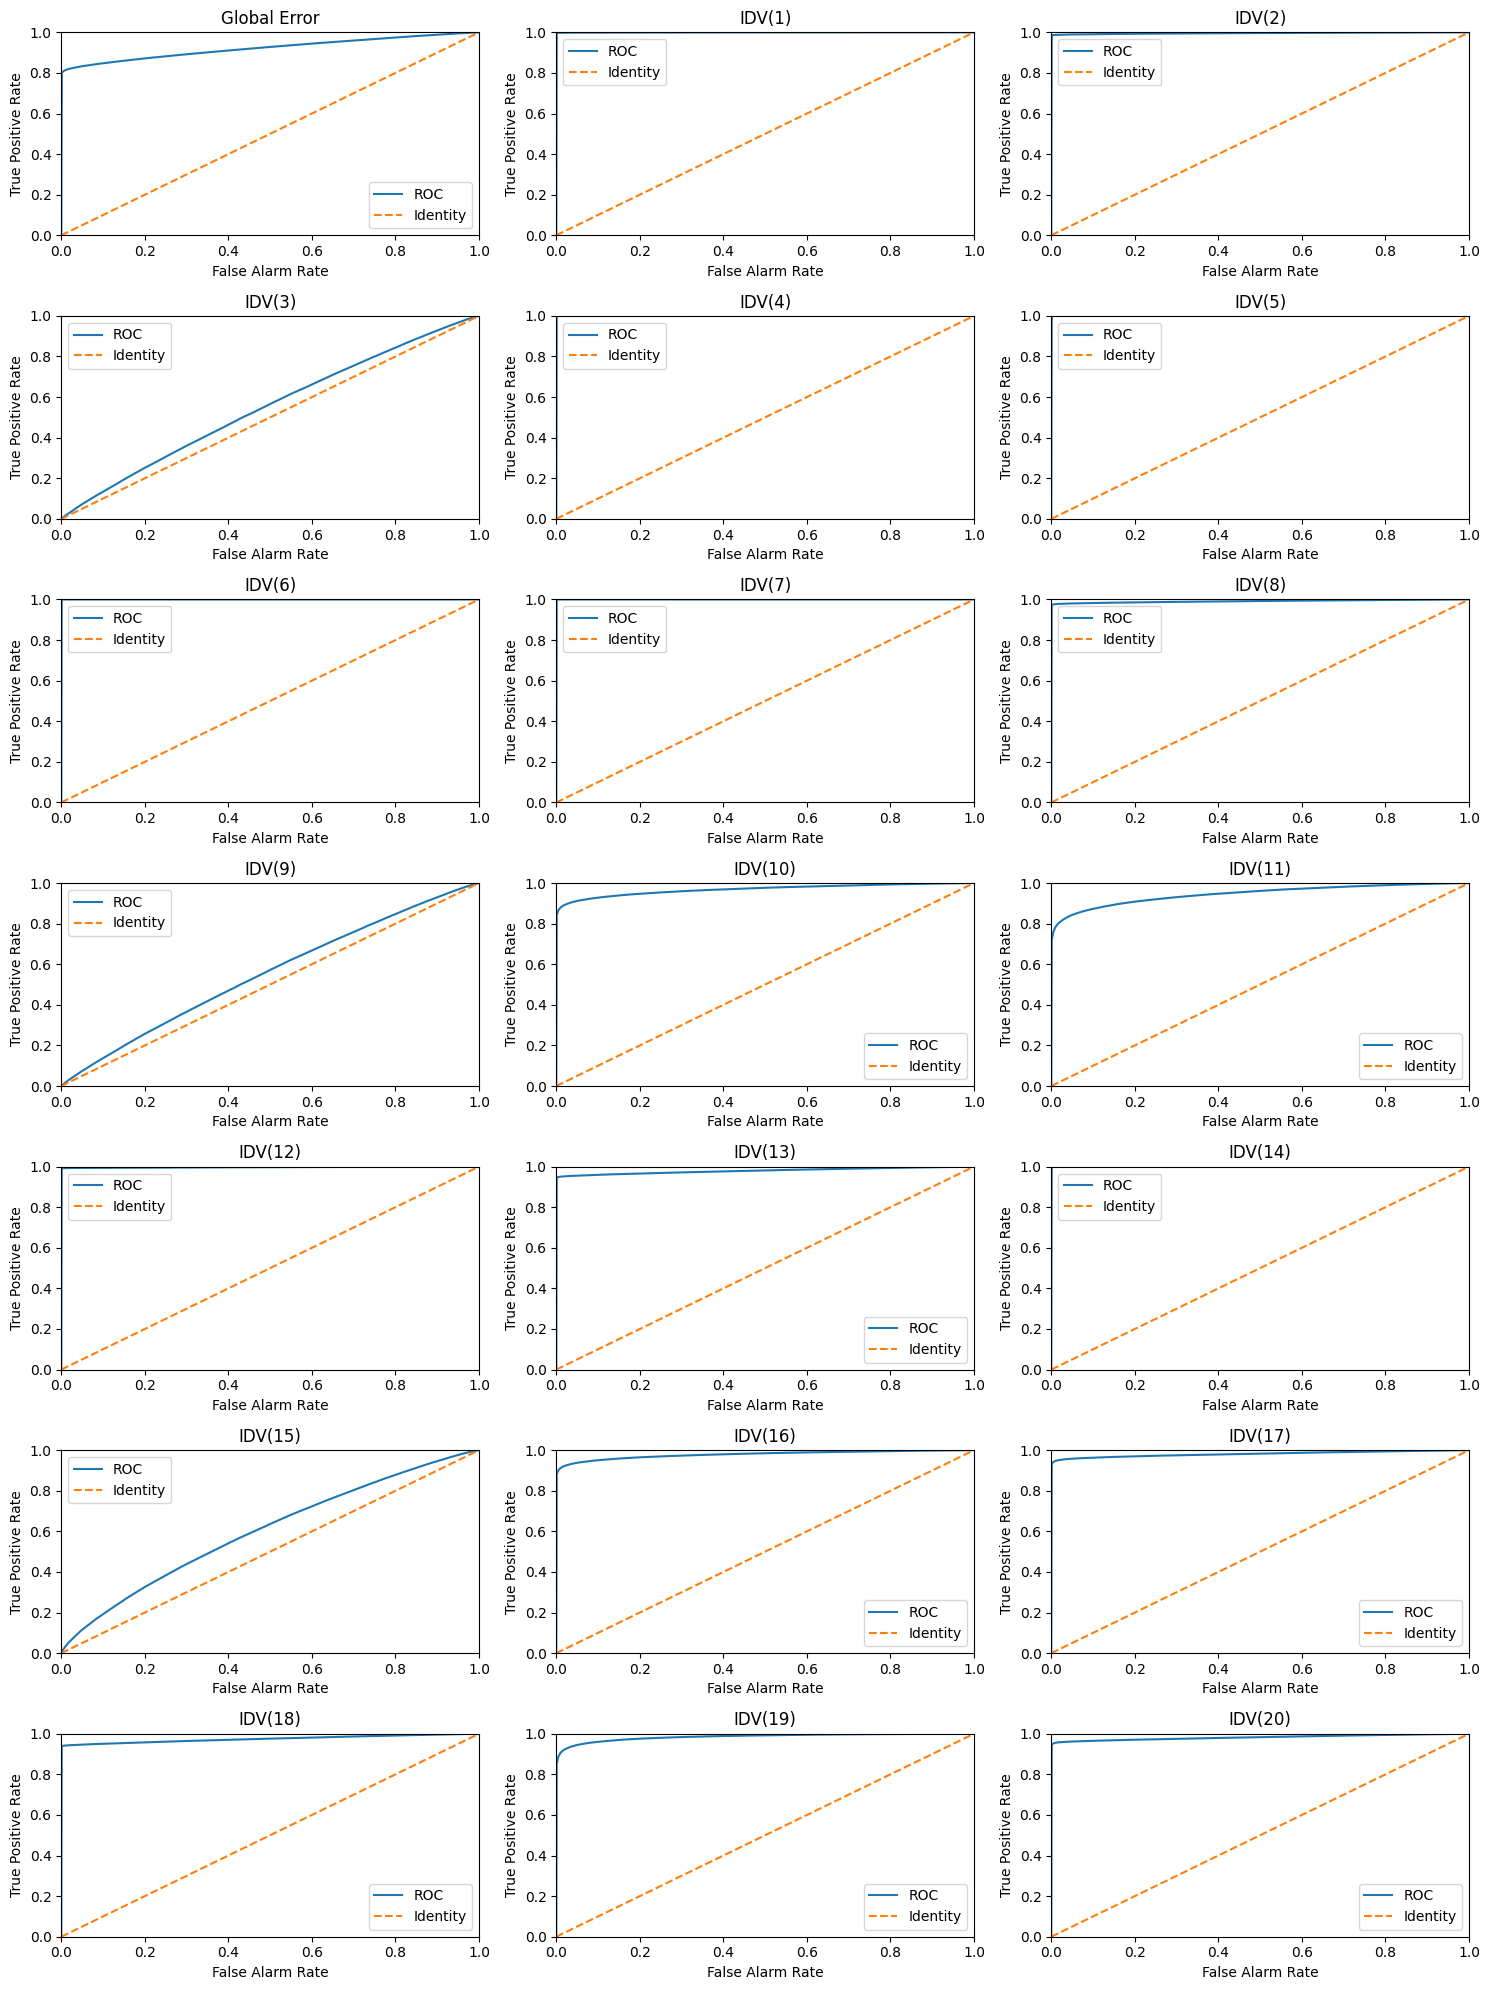

In [103]:
plot_all_roc_curves(result["roc_data"])